In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn as skl
import os
import os.path as osp
from datetime import datetime, timedelta
%matplotlib inline
pd.options.display.max_columns = None
plt.style.use('ggplot')

In [2]:
PATH_DATA = '/Users/aymanebenayada/Documents/data/'

In [3]:
dons2014 = pd.read_excel(osp.join(PATH_DATA,'Dons_2014.xlsx'))
dons2015 = pd.read_excel(osp.join(PATH_DATA,'Dons_2015.xlsx'))
dons2016 = pd.read_excel(osp.join(PATH_DATA,'Dons_2016.xlsx'))
dons2017 = pd.read_excel(osp.join(PATH_DATA,'Dons_2017.xlsx'))
dons2018 = pd.read_excel(osp.join(PATH_DATA,'Dons_2018.xlsx'))
dons = pd.concat([dons2014, dons2015, dons2016, dons2017, dons2018])
dons_columns = ['NUMERO_LOT', 'DATE_DE_RECEPTION', 'ID_CONTACT', 
                'MONTANT_MOUVEMENT', 'CAM_CODE', 'OPERATION', 'SEGMENT',
                'MOUVEMENT_ID', 'VENTILATION_ID', 'OFT_CODE', 'MODE_DE_PAIEMENT',
                'MONTANT_VENTILATION', 'RF']

dons.columns = dons_columns
dons.set_index('VENTILATION_ID', inplace=True)

In [4]:
dons.MONTANT_MOUVEMENT.fillna(0, inplace=True)
dons.MODE_DE_PAIEMENT.fillna('SIGN', inplace=True)
dons.dropna(inplace=True)
dons.MODE_DE_PAIEMENT.replace('CBW', 'CB', inplace=True)

In [5]:
mailjet = pd.read_excel(osp.join(PATH_DATA,'stat_mailjet.xlsx'), index_col=0)
mailjet_columns = ['ID', 'EMAIL', 'OPEN', 'CLICK', 'SENT', 'BOUNCE', 'BLOCKED', 'SPAM', 'UNSUB', 'TOTAL']
mailjet.columns = mailjet_columns
mailjet.set_index('EMAIL', inplace=True)

In [6]:
contacts = pd.read_excel(osp.join(PATH_DATA,'Tous_contacts.xlsx'), index_col=0)
contacts.set_index('ID_CTC', inplace=True)

contacts_columns = ['TYPE_CONTACT', 'DATE_NAISSANCE', 'DATE_CREATION', 'DECEDES',
                    'ADRESSE_POSTALE', 'PAYS', 'EMAIL_ADRESSE', 'EMAIL', 'OPTIN', 'TELEPHONE',
                    'STOP_TEL', 'STOP_MAILING', 'STOP_GENERAL', 'NPAI2', 'SEGMENT_ORIGINE',
                    'NOMBRE_DONS', 'MONTANT_DONS', 'DATE_PREMIER_DON', 'DATE_DERNIER_DON',
                    'ORIGINE_PREMIER', 'ORIGINE_DERNIER', 'MONTANT_DON_PREMIER',
                    'MONTANT_DON_DERNIER', 'NOMBRE_DONS_ANNEE_N', 'NOMBRE_DONS_ANNEE_N1',
                    'NOMBRE_DONS_ANNEE_N2', 'NOMBRE_DONS_ANNEE_N3', 'NOMBRE_DONS_ANNEE_N4',
                    'MONTANT_DONS_ANNEE_N', 'MONTANT_DONS_ANNEE_N1',
                    'MONTANT_DONS_ANNEE_N2', 'MONTANT_DONS_ANNEE_N3',
                    'MONTANT_DONS_ANNEE_N4', 'PA_ACTIF', 'DATE_DEBUT_PA_ACTIF',
                    'DATE_FIN_PA_ACTIF', 'CYCLE_PA_ACTIF', 'DATE_DERNIER_PA_ACTIF',
                    'ORIGINE_PA_ACTIF', 'NOMBRE_PRELEVEMENT', 'MONTANT_PRELEVEMENT',
                    'DATE_PREMIER_PRELEVEMENT', 'DATE_DERNIER_PRELEVEMENT', 'NOMBRE_ACHAT',
                    'MONTANT_ACHAT_MAX', 'MONTANT_ACHAT_MIN', 'DATE_PREMIER_ACHAT',
                    'DATE_DERNIER_ACHAT', 'NOMBRE_COTISATION', 'MONTANT_COTISATION',
                    'DATE_PREMIERE_COTISATION', 'DATE_DERNIERE_COTISATION',
                    'NOMBRE_PETITION', 'DATE_PREMIERE_PETITION', 'DATE_DERNIERE_PETITION']

contacts.columns = contacts_columns

In [7]:
contacts.DECEDES.value_counts()

oui    771
Name: DECEDES, dtype: int64

In [8]:
segment_origine = pd.read_excel(osp.join(PATH_DATA, 'Tous_contacts.xlsx'), sheet_name="Lexique codes origine", usecols='A:C')
segment_origine.set_index('SEGMENT_ORIGINE', inplace=True)

In [9]:
contacts.DATE_CREATION = pd.to_datetime(contacts.DATE_CREATION, format='%Y%m%d', errors='coerce')
contacts.DATE_DEBUT_PA_ACTIF = pd.to_datetime(contacts.DATE_DEBUT_PA_ACTIF, format='%Y%m%d', errors='coerce')
contacts.DATE_DERNIER_ACHAT = pd.to_datetime(contacts.DATE_DERNIER_ACHAT, format='%Y%m%d', errors='coerce')
contacts.DATE_DERNIER_DON = pd.to_datetime(contacts.DATE_DERNIER_DON, format='%Y%m%d', errors='coerce')
contacts.DATE_DERNIER_PA_ACTIF = pd.to_datetime(contacts.DATE_DERNIER_PA_ACTIF, format='%Y%m%d', errors='coerce')
contacts.DATE_DERNIER_PRELEVEMENT = pd.to_datetime(contacts.DATE_DERNIER_PRELEVEMENT, format='%Y%m%d', errors='coerce')
contacts.DATE_DERNIERE_COTISATION = pd.to_datetime(contacts.DATE_DERNIERE_COTISATION, format='%Y%m%d', errors='coerce')
contacts.DATE_DERNIERE_PETITION = pd.to_datetime(contacts.DATE_DERNIERE_PETITION, format='%Y%m%d', errors='coerce')
contacts.DATE_FIN_PA_ACTIF = pd.to_datetime(contacts.DATE_FIN_PA_ACTIF, format='%Y%m%d', errors='coerce')
contacts.DATE_NAISSANCE = pd.to_datetime(contacts.DATE_NAISSANCE, format='%Y%m%d', errors='coerce')
contacts.DATE_PREMIER_ACHAT = pd.to_datetime(contacts.DATE_PREMIER_ACHAT, format='%Y%m%d', errors='coerce')
contacts.DATE_PREMIER_DON = pd.to_datetime(contacts.DATE_PREMIER_DON, format='%Y%m%d', errors='coerce')
contacts.DATE_PREMIER_PRELEVEMENT = pd.to_datetime(contacts.DATE_PREMIER_PRELEVEMENT, format='%Y%m%d', errors='coerce')
contacts.DATE_PREMIERE_COTISATION = pd.to_datetime(contacts.DATE_PREMIERE_COTISATION, format='%Y%m%d', errors='coerce')
contacts.DATE_PREMIERE_PETITION = pd.to_datetime(contacts.DATE_PREMIERE_PETITION, format='%Y%m%d', errors='coerce')

In [10]:
contacts.EMAIL = contacts.EMAIL.str.lower().map(dict(oui=1, non=0))
contacts.DECEDES = contacts.DECEDES.str.lower().map(dict(oui=1, non=0)).fillna(0)
contacts.OPTIN = contacts.OPTIN.str.lower().map(dict(oui=1, non=0))
contacts.TELEPHONE = contacts.TELEPHONE.str.lower().map(dict(oui=1, non=0)).fillna(0)
contacts.ADRESSE_POSTALE = contacts.ADRESSE_POSTALE.str.lower().map(dict(oui=1, non=0))
contacts.STOP_TEL = contacts.STOP_TEL.str.lower().map(dict(oui=1, non=0)).fillna(0)
contacts.STOP_MAILING = contacts.STOP_MAILING.str.lower().map(dict(oui=1, non=0)).fillna(0)
contacts.STOP_GENERAL = contacts.STOP_GENERAL.str.lower().map(dict(oui=1, non=0)).fillna(0)
contacts.NPAI2 = contacts.NPAI2.str.lower().map(dict(oui=1, non=0)).fillna(0)

In [11]:
contacts.MONTANT_DONS.fillna(0, inplace=True)
contacts.MONTANT_DON_PREMIER.fillna(0, inplace=True)
contacts.MONTANT_DON_DERNIER.fillna(0, inplace=True)
contacts.MONTANT_DONS.fillna(0, inplace=True)

In [12]:
contacts['MORAL'] = contacts.TYPE_CONTACT.map(dict(MORAL=1, PHYSIQUE=0))
contacts['PHYSIQUE'] = contacts.TYPE_CONTACT.map(dict(MORAL=0, PHYSIQUE=1))
contacts['NEW_ADRESSE_POSTALE'] = contacts[['ADRESSE_POSTALE', 'NPAI2']].apply(lambda x: x[0] if x[1] == 0 else 0, axis=1)
contacts['CANAL_ACQUISITION'] = contacts.SEGMENT_ORIGINE.map(segment_origine.to_dict()["Canal d'acquisition"])
contacts['CANAL_ACQUISITION_AGG'] = contacts.SEGMENT_ORIGINE.map(segment_origine.to_dict()["Canal d'acquisition agrégé"])
contacts['CANAL_ACQUISITION_PREMIER'] = contacts.ORIGINE_PREMIER.map(segment_origine.to_dict()["Canal d'acquisition"])
contacts['CANAL_ACQUISITION_AGG_PREMIER'] = contacts.ORIGINE_PREMIER.map(segment_origine.to_dict()["Canal d'acquisition agrégé"])
contacts['CANAL_ACQUISITION_DERNIER'] = contacts.ORIGINE_DERNIER.map(segment_origine.to_dict()["Canal d'acquisition"])
contacts['CANAL_ACQUISITION_AGG_DERNIER'] = contacts.ORIGINE_DERNIER.map(segment_origine.to_dict()["Canal d'acquisition agrégé"])

In [13]:
year = contacts.DATE_NAISSANCE.apply(lambda x: x.year)
mask1 = (year < 1900) | (year > 2005)
mask2 = (contacts.DATE_NAISSANCE == datetime(1970,1,1))
mask3 = (contacts.DATE_NAISSANCE == datetime(1900,1,1))
mask = (mask1 | mask2 | mask3)
contacts.loc[mask, 'DATE_NAISSANCE'] = np.nan

In [14]:
contacts['AGE'] = contacts.DATE_NAISSANCE.apply(lambda x: np.floor((datetime.today()-x).days/365))

def tranche_age(age):
    tr = None
    if age <= 25:
        tr = '0-25'
    elif 25 < age <= 45:
        tr = '25-45'
    elif 45 < age <= 65:
        tr = '45-65'
    elif age > 65:
        tr = '65+'
    return tr

contacts['TRANCHE_AGE'] = contacts.AGE.apply(tranche_age)

In [15]:
# on retire les signataires
cont_oft = pd.crosstab(dons.ID_CONTACT, dons.OFT_CODE)
cont_cam = pd.crosstab(dons.ID_CONTACT, dons.CAM_CODE)

signataires = cont_oft[(cont_oft.ACH == 0) & (cont_oft.COTI == 0) & (cont_oft.DON == 0)].index
reguliers = cont_cam[cont_cam.PA != 0].index
occa = cont_cam[(cont_cam.PA == 0) & (cont_cam.TW == 0) & (cont_cam.WTR == 0) & (cont_cam.EVENT == 0)].index
event = cont_cam[((cont_cam.TW != 0) | (cont_cam.WTR != 0) | (cont_cam.EVENT != 0)) &
                 (cont_cam.ADH == 0) & (cont_cam.CIEL == 0) & (cont_cam.DIV == 0) &
                 (cont_cam.F == 0) & (cont_cam.FE == 0) & (cont_cam.FMD == 0) &
                 (cont_cam.FTEL == 0) & (cont_cam.HF == 0) & (cont_cam.IA == 0) &
                 (cont_cam.O == 0) & (cont_cam.OI == 0) & (cont_cam.PA == 0) &
                 (cont_cam.PART == 0) & (cont_cam.PLAQ == 0) & (cont_cam.PROGJE == 0) &
                 (cont_cam.PROGSE == 0) & (cont_cam.PWEB == 0) & (cont_cam.RA == 0) &
                 (cont_cam.RF == 0) & (cont_cam.SITE == 0) & (cont_cam.TEST_PET == 0) &
                 (cont_cam.TTEL == 0) & (cont_cam.URGENCE == 0)].index

contacts['REGULIER_EVENT_OCCA'] = np.nan
contacts.loc[contacts.index.isin(signataires), 'REGULIER_EVENT_OCCA'] = 'Signataires'
contacts.loc[contacts.index.isin(reguliers), 'REGULIER_EVENT_OCCA'] = 'Régulier'
contacts.loc[contacts.index.isin([cont for cont in occa if cont not in signataires]) , 'REGULIER_EVENT_OCCA'] = 'Occasionnel'
contacts.loc[contacts.index.isin([cont for cont in event if cont not in signataires]), 'REGULIER_EVENT_OCCA'] = 'Evenementiel'

In [16]:
data = dons.join(contacts, on='ID_CONTACT', how='left')

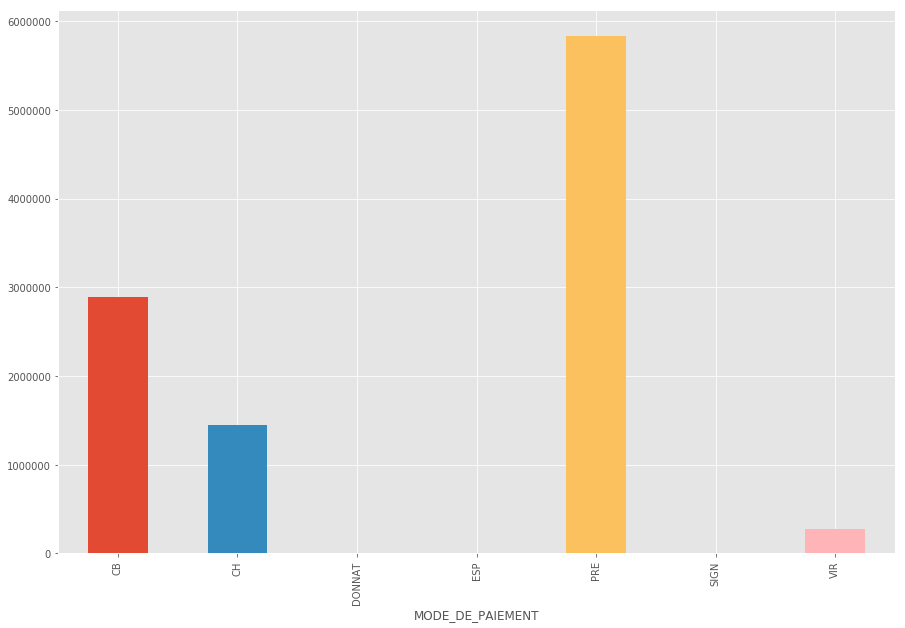

In [17]:
data.groupby('MODE_DE_PAIEMENT').sum().MONTANT_VENTILATION.plot(kind='bar', figsize=(15,10))

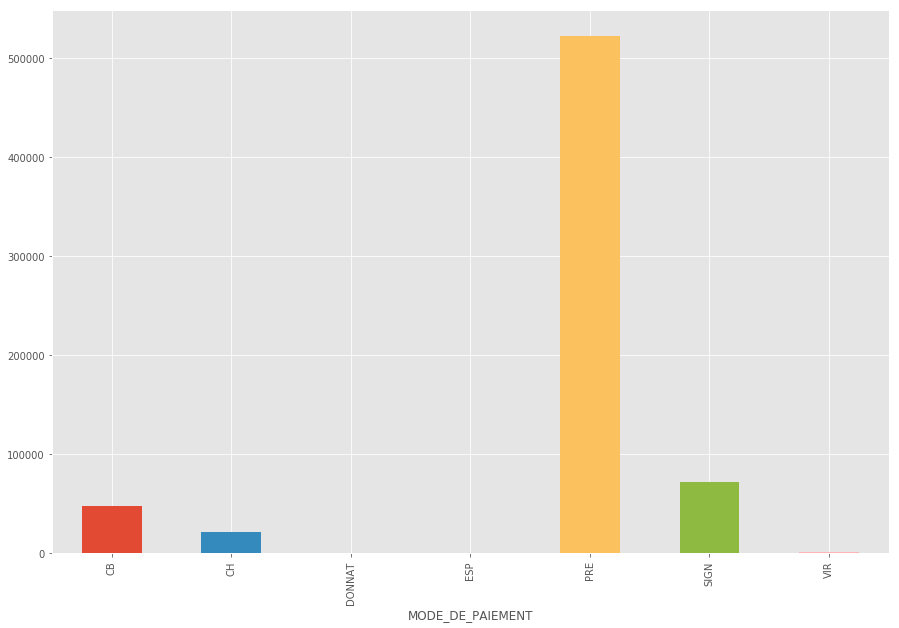

In [18]:
data.groupby('MODE_DE_PAIEMENT').count().MONTANT_VENTILATION.plot(kind='bar', figsize=(15,10))

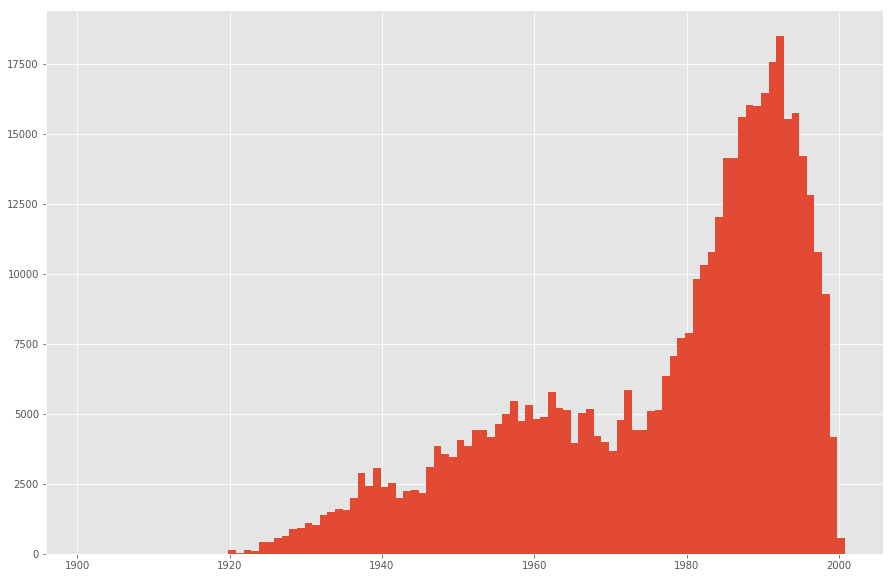

In [19]:
data.DATE_NAISSANCE.hist(bins=100, figsize=(15, 10))

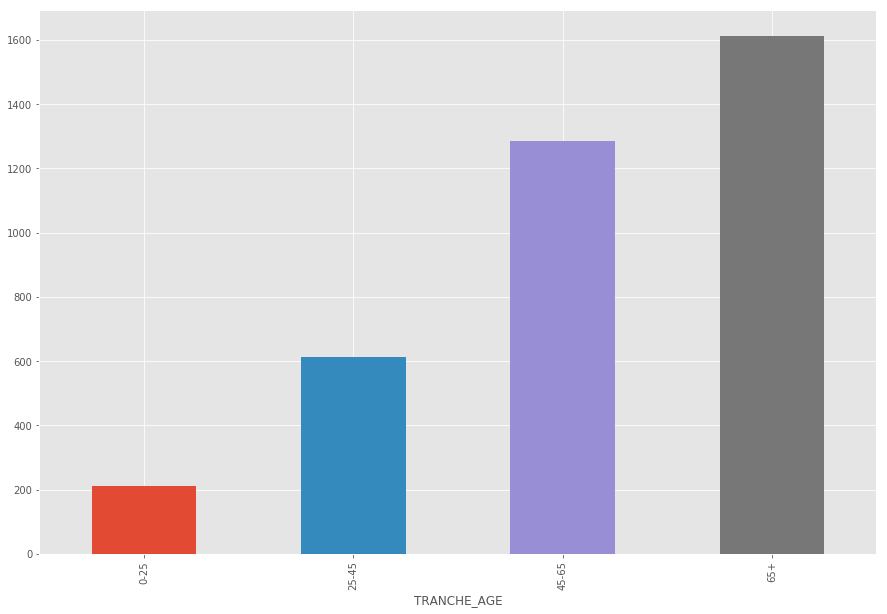

In [20]:
data[data.DECEDES == 0].groupby('TRANCHE_AGE').mean().MONTANT_DONS.plot(kind='bar', figsize=(15,10))

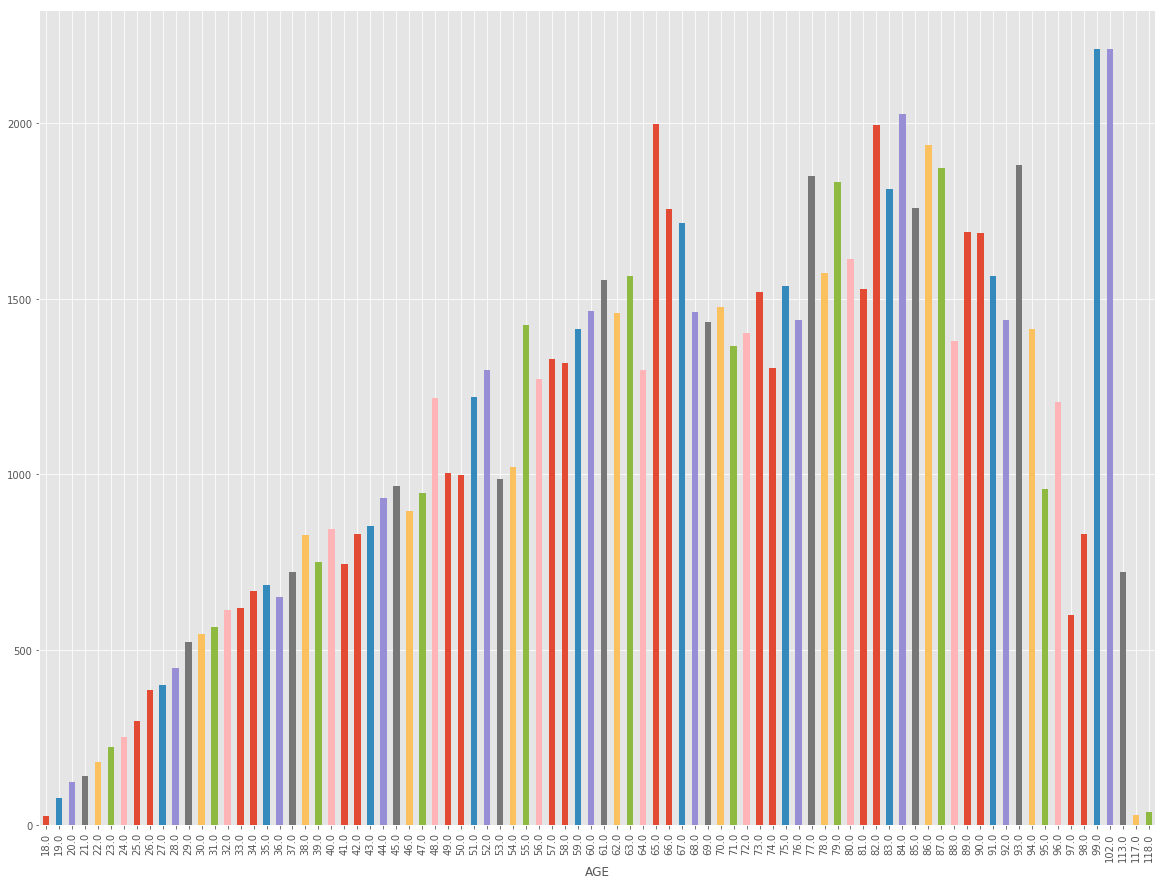

In [21]:
data[data.DECEDES == 0].groupby('AGE').mean().MONTANT_DONS.plot(kind='bar', figsize=(20,15))

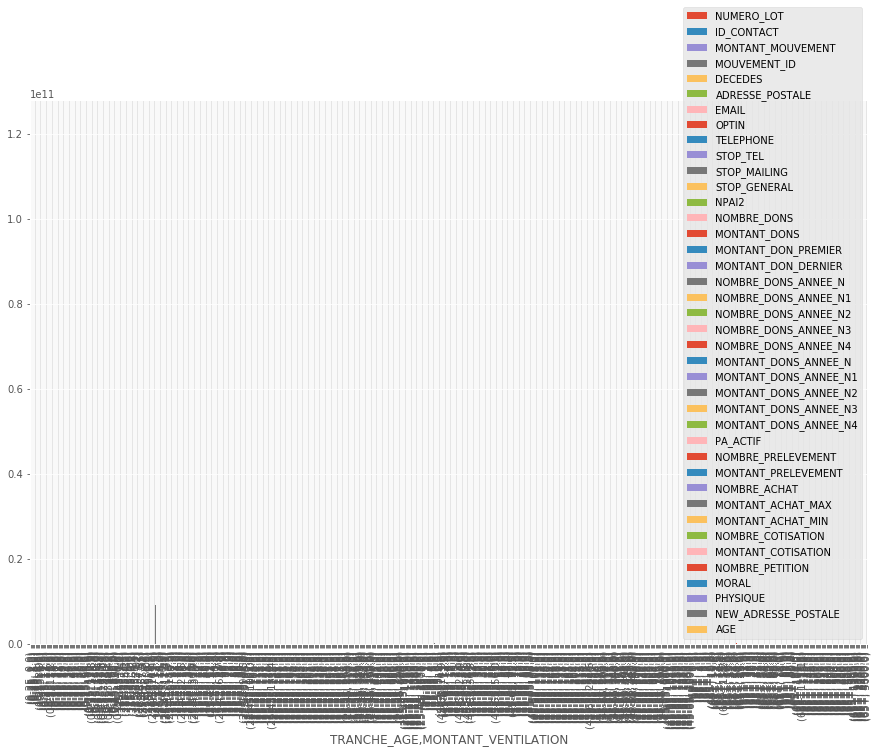

In [22]:
data.groupby(['TRANCHE_AGE', 'MONTANT_VENTILATION']).sum().plot(kind='bar', figsize=(15,10))

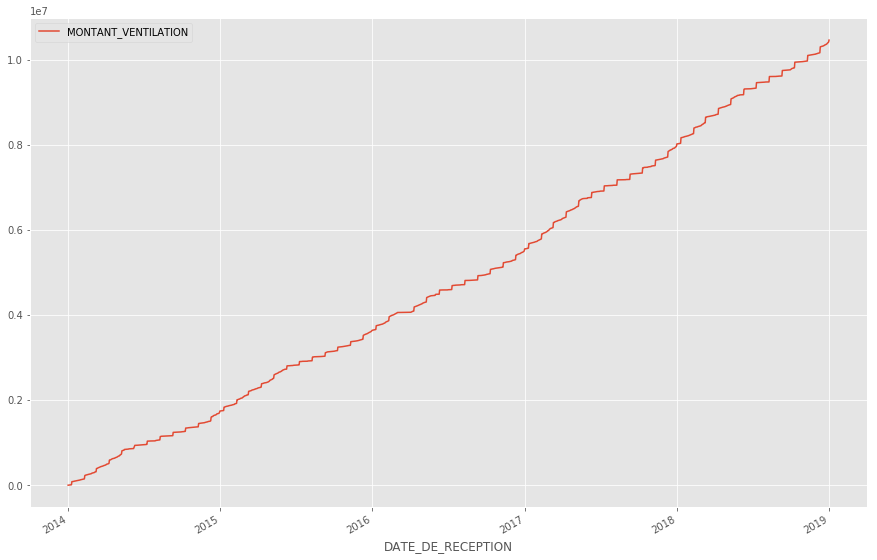

In [23]:
data.groupby('DATE_DE_RECEPTION').sum().MONTANT_VENTILATION.cumsum().plot(x='DATE_DE_RECEPTION', kind='line', figsize=(15,10), legend=True)

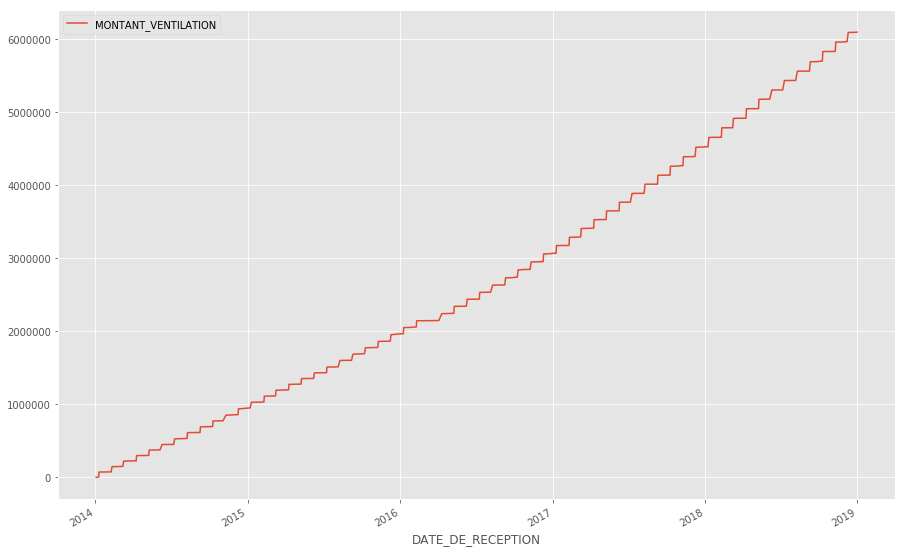

In [24]:
data[data.REGULIER_EVENT_OCCA == 'Régulier'].groupby('DATE_DE_RECEPTION').sum().MONTANT_VENTILATION.cumsum().plot(kind='line', figsize=(15,10), legend=True)

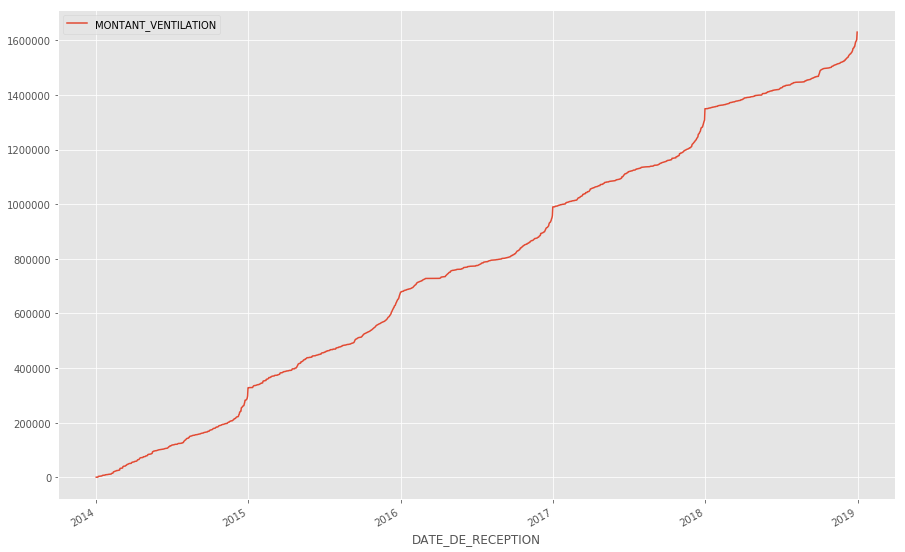

In [25]:
data[data.REGULIER_EVENT_OCCA == 'Occasionnel'].groupby('DATE_DE_RECEPTION').sum().MONTANT_VENTILATION.cumsum().plot(kind='line', figsize=(15,10), legend=True)

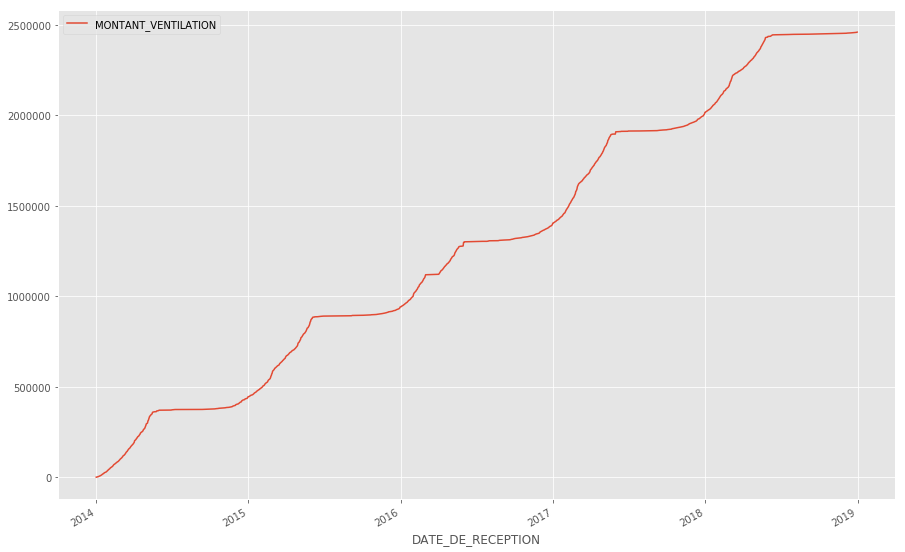

In [26]:
data[data.REGULIER_EVENT_OCCA == 'Evenementiel'].groupby('DATE_DE_RECEPTION').sum().MONTANT_VENTILATION.cumsum().plot(kind='line', figsize=(15,10), legend=True)

In [27]:
lexique_cam_code = pd.read_excel(osp.join(PATH_DATA, 'Dons_2018.xlsx'), sheet_name='Lexique codes opé et campagne', usecols='A:C')

In [28]:
lexique_cam_code.dropna(how='any', inplace=True)
lexique_cam_code_red = lexique_cam_code.drop('Définitation campagne', axis=1)
lexique_cam_code_red.replace('/', 'Unknown', inplace=True)
lexique_cam_code_red.set_index('Codes campagnes', inplace=True)
dict_canal = dict(lexique_cam_code_red.Canal)

In [29]:
data['Canal'] = dons.CAM_CODE.map(dict_canal)

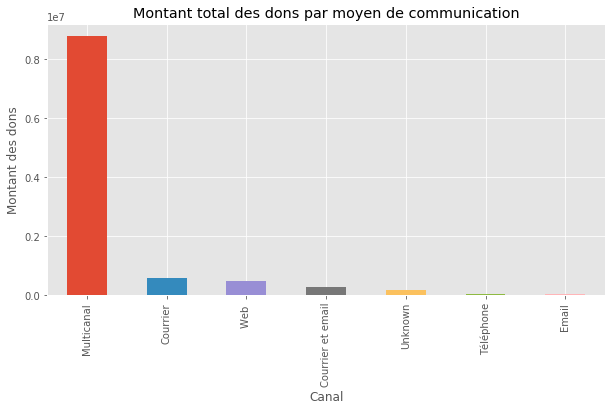

In [30]:
plt.figure(figsize=(10,5))
ax = data.groupby('Canal').sum().MONTANT_VENTILATION.sort_values(ascending=False).plot(kind='bar', title ='Montant total des dons par moyen de communication')
ax.set(ylabel='Montant des dons')
plt.savefig('canal_1.png', bbox_inches='tight')

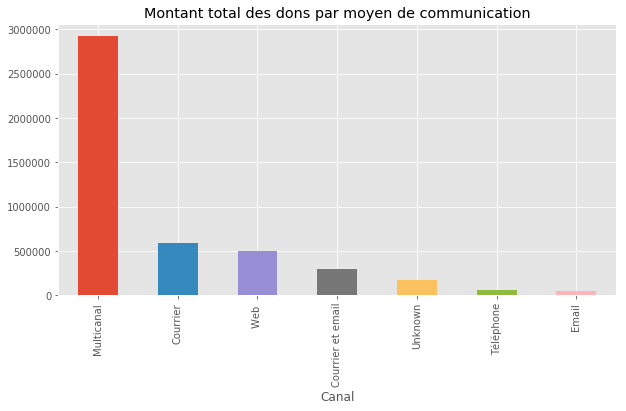

In [31]:
#Excluding 'PA' from Multicanal 
dict_canal['PA'] = 'PA'
data['Canal'] = dons.CAM_CODE.map(dict_canal)

plt.figure(figsize=(10,5))
data.groupby('Canal').sum().drop('PA', axis=0).MONTANT_VENTILATION.sort_values(ascending=False).plot(kind='bar', title ='Montant total des dons par moyen de communication')
plt.savefig('canal_2.png', bbox_inches='tight')

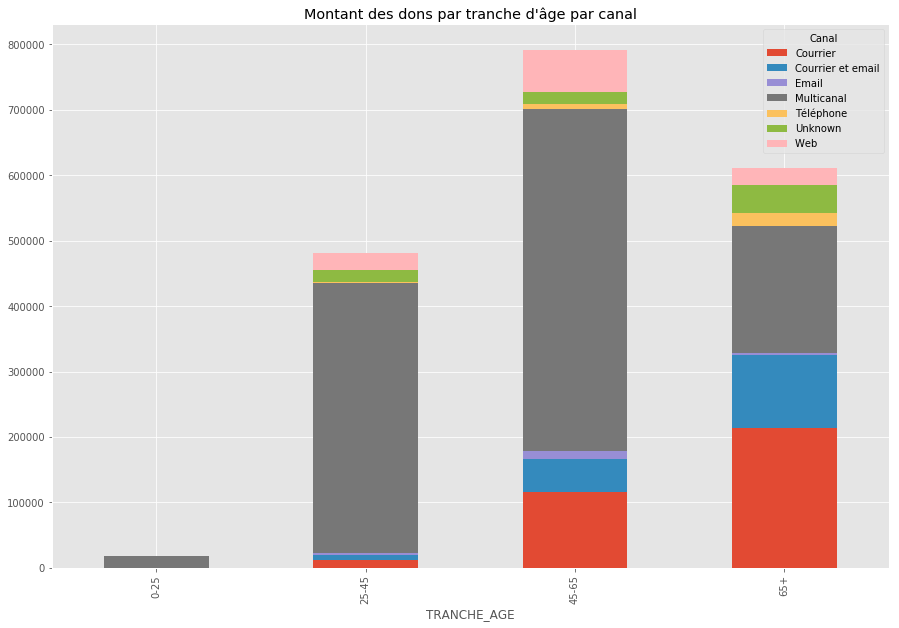

In [32]:
canal_age = data.groupby(['TRANCHE_AGE','Canal']).sum().unstack().MONTANT_VENTILATION.drop('PA', axis=1)
canal_age.plot(kind='bar', stacked=True, title="Montant des dons par tranche d'âge par canal", figsize=(15,10))
plt.savefig('canal_3.png', bbox_inches='tight')

In [33]:
# Stats de moyen de paiement 
dons.head()

,NUMERO_LOT,DATE_DE_RECEPTION,ID_CONTACT,MONTANT_MOUVEMENT,CAM_CODE,OPERATION,SEGMENT,MOUVEMENT_ID,OFT_CODE,MODE_DE_PAIEMENT,MONTANT_VENTILATION,RF
VENTILATION_ID,,,,,,,,,,,,
2415602.0,29770,2014-01-10,713843,10.0,PA,PA,PA,1116673.0,DON,PRE,10.0,Oui
2415603.0,29770,2014-01-10,818435,7.0,PA,PA,PA,1116674.0,DON,PRE,7.0,Oui
2415604.0,29770,2014-01-10,811465,10.0,PA,PA,PA,1116675.0,DON,PRE,10.0,Oui
2415605.0,29770,2014-01-10,818439,10.0,PA,PA,PA,1116676.0,DON,PRE,10.0,Oui
2415606.0,29770,2014-01-10,818443,0.0,PA,PA,PA,1116677.0,DON,PRE,0.0,Oui


In [34]:
dons.MODE_DE_PAIEMENT.value_counts()

PRE       522160
SIGN       72103
CB         47678
CH         22083
VIR         1349
ESP          125
DONNAT         1
Name: MODE_DE_PAIEMENT, dtype: int64

In [35]:
dons_mode_pay_no_sign = dons[(dons.MODE_DE_PAIEMENT != 'SIGN') & (dons.MODE_DE_PAIEMENT != 'DONNAT')]
dons_mode_pay_no_sign.head()

,NUMERO_LOT,DATE_DE_RECEPTION,ID_CONTACT,MONTANT_MOUVEMENT,CAM_CODE,OPERATION,SEGMENT,MOUVEMENT_ID,OFT_CODE,MODE_DE_PAIEMENT,MONTANT_VENTILATION,RF
VENTILATION_ID,,,,,,,,,,,,
2415602.0,29770,2014-01-10,713843,10.0,PA,PA,PA,1116673.0,DON,PRE,10.0,Oui
2415603.0,29770,2014-01-10,818435,7.0,PA,PA,PA,1116674.0,DON,PRE,7.0,Oui
2415604.0,29770,2014-01-10,811465,10.0,PA,PA,PA,1116675.0,DON,PRE,10.0,Oui
2415605.0,29770,2014-01-10,818439,10.0,PA,PA,PA,1116676.0,DON,PRE,10.0,Oui
2415606.0,29770,2014-01-10,818443,0.0,PA,PA,PA,1116677.0,DON,PRE,0.0,Oui


In [36]:
s1 = dons_mode_pay_no_sign.groupby(['ID_CONTACT', 'MODE_DE_PAIEMENT']).count().NUMERO_LOT
s2 = dons_mode_pay_no_sign.groupby('ID_CONTACT').count().NUMERO_LOT

In [37]:
dons_pay = s1.unstack().fillna(0)
dons_pay['TOTAL_NO_SIGN'] = s2
dons_pay.head()

MODE_DE_PAIEMENT,CB,CH,ESP,PRE,VIR,TOTAL_NO_SIGN
ID_CONTACT,,,,,,
2,1.0,0.0,7.0,0.0,2.0,10
16,0.0,1.0,0.0,0.0,0.0,1
26,3.0,4.0,0.0,0.0,0.0,7
55,0.0,2.0,0.0,59.0,0.0,61
76,0.0,5.0,0.0,0.0,0.0,5


In [38]:
dons_pay['CB'] = round(dons_pay['CB'] / dons_pay['TOTAL_NO_SIGN'], 2)
dons_pay['CH'] = round(dons_pay['CH'] / dons_pay['TOTAL_NO_SIGN'], 2)
dons_pay['ESP'] = round(dons_pay['ESP'] / dons_pay['TOTAL_NO_SIGN'], 2)
dons_pay['PRE'] = round(dons_pay['PRE'] / dons_pay['TOTAL_NO_SIGN'], 2)
dons_pay['VIR'] = round(dons_pay['VIR'] / dons_pay['TOTAL_NO_SIGN'], 2)
dons_pay.head()

MODE_DE_PAIEMENT,CB,CH,ESP,PRE,VIR,TOTAL_NO_SIGN
ID_CONTACT,,,,,,
2,0.10,0.00,0.7,0.00,0.2,10
16,0.00,1.00,0.0,0.00,0.0,1
26,0.43,0.57,0.0,0.00,0.0,7
55,0.00,0.03,0.0,0.97,0.0,61
76,0.00,1.00,0.0,0.00,0.0,5


In [39]:
dons_pay.rename(columns={'CB': 'CB_RATE', 
                         'CH': 'CH_RATE',
                        'ESP': 'ESP_RATE',
                        'PRE': 'PRE_RATE',
                        'VIR': 'VIR_RATE'}, inplace=True)

In [40]:
dons_pay.drop('TOTAL_NO_SIGN', axis=1, inplace=True)

In [41]:
dons_pay.head()

MODE_DE_PAIEMENT,CB_RATE,CH_RATE,ESP_RATE,PRE_RATE,VIR_RATE
ID_CONTACT,,,,,
2,0.10,0.00,0.7,0.00,0.2
16,0.00,1.00,0.0,0.00,0.0
26,0.43,0.57,0.0,0.00,0.0
55,0.00,0.03,0.0,0.97,0.0
76,0.00,1.00,0.0,0.00,0.0


## Types de campagne par id contact

In [42]:
s3 = dons_mode_pay_no_sign.groupby(['ID_CONTACT', 'CAM_CODE']).count().NUMERO_LOT
s4 = dons_mode_pay_no_sign.groupby('ID_CONTACT').count().NUMERO_LOT

In [43]:
dons_cam = s3.unstack().fillna(0)
dons_cam['TOTAL_NO_SIGN'] = s4
dons_cam.head()

CAM_CODE,ADH,CIEL,DIV,EVENT,F,FE,FMD,FTEL,HF,IA,O,PA,PART,PLAQ,PROGJE,PROGSE,PWEB,RA,RF,SITE,TTEL,TW,URGENCE,WTR,TOTAL_NO_SIGN
ID_CONTACT,,,,,,,,,,,,,,,,,,,,,,,,,
2,0.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
26,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7
55,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61
76,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [44]:
for col in list(dons_cam.columns):
    if col != 'TOTAL_NO_SIGN':
        dons_cam[col] = round(dons_cam[col] / dons_cam['TOTAL_NO_SIGN'], 2)

In [45]:
dons_cam.drop('TOTAL_NO_SIGN', axis=1, inplace=True)
dons_cam.head()

CAM_CODE,ADH,CIEL,DIV,EVENT,F,FE,FMD,FTEL,HF,IA,O,PA,PART,PLAQ,PROGJE,PROGSE,PWEB,RA,RF,SITE,TTEL,TW,URGENCE,WTR
ID_CONTACT,,,,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.6,0.30,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0
16,0.0,0.0,0.00,0.0,0.00,0.0,0.0,1.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
26,0.0,0.0,0.00,0.0,0.29,0.0,0.0,0.0,0.0,0.0,0.14,0.00,0.0,0.0,0.0,0.14,0.0,0.0,0.0,0.43,0.0,0.0,0.0,0.0
55,0.0,0.0,0.03,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.97,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
76,0.4,0.0,0.00,0.0,0.20,0.0,0.0,0.0,0.0,0.2,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.2,0.0,0.00,0.0,0.0,0.0,0.0


In [46]:
features = pd.concat([dons_pay, dons_cam], axis=1)

In [47]:
features.head()

,CB_RATE,CH_RATE,ESP_RATE,PRE_RATE,VIR_RATE,ADH,CIEL,DIV,EVENT,F,FE,FMD,FTEL,HF,IA,O,PA,PART,PLAQ,PROGJE,PROGSE,PWEB,RA,RF,SITE,TTEL,TW,URGENCE,WTR
ID_CONTACT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0.10,0.00,0.7,0.00,0.2,0.0,0.6,0.30,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0
16,0.00,1.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,1.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
26,0.43,0.57,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.29,0.0,0.0,0.0,0.0,0.0,0.14,0.00,0.0,0.0,0.0,0.14,0.0,0.0,0.0,0.43,0.0,0.0,0.0,0.0
55,0.00,0.03,0.0,0.97,0.0,0.0,0.0,0.03,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.97,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
76,0.00,1.00,0.0,0.00,0.0,0.4,0.0,0.00,0.0,0.20,0.0,0.0,0.0,0.0,0.2,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.2,0.0,0.00,0.0,0.0,0.0,0.0


In [48]:
features.columns

Index(['CB_RATE', 'CH_RATE', 'ESP_RATE', 'PRE_RATE', 'VIR_RATE', 'ADH', 'CIEL',
       'DIV', 'EVENT', 'F', 'FE', 'FMD', 'FTEL', 'HF', 'IA', 'O', 'PA', 'PART',
       'PLAQ', 'PROGJE', 'PROGSE', 'PWEB', 'RA', 'RF', 'SITE', 'TTEL', 'TW',
       'URGENCE', 'WTR'],
      dtype='object')

#### Join with Aymane

In [49]:
features_aymane = pd.read_csv('/Users/aymanebenayada/Documents/data/features_aymane.csv', sep=',')

In [50]:
features_aymane.set_index('ID_CTC', inplace=True)

In [59]:
features_aymane.DUREE_BDD.fillna(0, inplace=True)

In [150]:
df_final = features_aymane.join(features)

In [151]:
df_final.head()

,AGE,AGE_BDD,MORAL,PHYSIQUE,NEW_ADRESSE_POSTALE,EMAIL,OPTIN,TELEPHONE,STOP_TEL,STOP_MAILING,STOP_GENERAL,OPEN,CLICK,SENT,BOUNCE,BLOCKED,SPAM,UNSUB,TOTAL,SEGMENT_ORIGINE,DUREE_BDD,ACH_MIN,ACH_MAX,ACH_TOTAL,ACH_STD,ACH_MEAN,ACH_NUM,COTI_MIN,COTI_MAX,COTI_STD,COTI_MEAN,COTI_NUM,COTI_TOTAL,DON_STD,DON_MIN,DON_TOTAL,DON_MAX,DON_MEAN,DON_NUM,SIGN_NUM,CB_RATE,CH_RATE,ESP_RATE,PRE_RATE,VIR_RATE,ADH,CIEL,DIV,EVENT,F,FE,FMD,FTEL,HF,IA,O,PA,PART,PLAQ,PROGJE,PROGSE,PWEB,RA,RF,SITE,TTEL,TW,URGENCE,WTR
ID_CTC,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,39.0,1,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.00,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,39.0,0,1,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,666,5.961644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.274867,5.0,194.34,74.34,19.434,10.0,0.0,0.1,0.0,0.7,0.0,0.2,0.0,0.6,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0
3,0.0,27.0,0,1,1.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,795,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.00,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0.0,26.0,0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.00,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,0.0,24.0,0,1,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,691,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.00,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
df_final[features.columns] = df_final[features.columns].fillna(0)

In [153]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251392 entries, 1 to 1376621
Data columns (total 69 columns):
AGE                    251392 non-null float64
AGE_BDD                251392 non-null float64
MORAL                  251392 non-null int64
PHYSIQUE               251392 non-null int64
NEW_ADRESSE_POSTALE    251392 non-null float64
EMAIL                  251392 non-null int64
OPTIN                  251392 non-null float64
TELEPHONE              251392 non-null float64
STOP_TEL               251392 non-null float64
STOP_MAILING           251392 non-null float64
STOP_GENERAL           251392 non-null float64
OPEN                   251392 non-null float64
CLICK                  251392 non-null float64
SENT                   251392 non-null float64
BOUNCE                 251392 non-null float64
BLOCKED                251392 non-null float64
SPAM                   251392 non-null float64
UNSUB                  251392 non-null float64
TOTAL                  251392 non-null float64
S

In [154]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [155]:
continuous_features = ['AGE', 'AGE_BDD', 'OPEN', 'CLICK', 'SENT', 'BOUNCE', 'BLOCKED', 'SPAM', 'UNSUB', 'TOTAL', 'DUREE_BDD', 'ACH_MIN', 'ACH_MAX', 
                       'ACH_TOTAL', 'ACH_STD', 'ACH_MEAN', 'ACH_NUM', 'COTI_MIN', 'COTI_MAX', 'COTI_STD', 'COTI_MEAN', 'COTI_NUM', 'COTI_TOTAL', 
                       'DON_STD', 'DON_MIN', 'DON_TOTAL', 'DON_MAX', 'DON_MEAN', 'DON_NUM', 'SIGN_NUM', 'CB_RATE', 'CH_RATE', 'ESP_RATE', 
                       'PRE_RATE', 'VIR_RATE', 'ADH', 'CIEL', 'DIV', 'EVENT', 'F', 'FE', 'FMD', 'FTEL', 'HF', 'IA', 'O', 'PA', 'PART', 'PLAQ', 'PROGJE', 
                       'PROGSE', 'PWEB', 'RA', 'RF', 'SITE', 'TTEL', 'TW', 'URGENCE', 'WTR']

categorical_features = ['MORAL', 'PHYSIQUE', 'NEW_ADRESSE_POSTALE', 'EMAIL', 'OPTIN', 'TELEPHONE', 'STOP_TEL', 'STOP_MAILING', 'STOP_GENERAL',
                        'SEGMENT_ORIGINE']


In [156]:
mms = MinMaxScaler()
mms.fit(df_final[continuous_features])
df_final[continuous_features] = mms.transform(df_final[continuous_features])

In [157]:
Sum_of_squared_distances = []
K = range(1,50)
for k in K:
    print(k)
    km = KMeans(n_clusters=k)
    km = km.fit(df_final)
    Sum_of_squared_distances.append(km.inertia_)

1
2
3
4
5
6


KeyboardInterrupt: 

In [ ]:
plt.subplots( figsize=(20,20))
plt.plot(K[1:], Sum_of_squared_distances[1:], 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [158]:
km = KMeans(n_clusters=4)

In [159]:
km.fit(df_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [160]:
y = km.predict(df_final)

In [161]:
df_final['CLUSTER'] = y

In [162]:
df_final[continuous_features] = mms.inverse_transform(df_final[continuous_features])

In [163]:
df_final.shape

(251392, 70)

In [164]:
df_final.groupby('CLUSTER').agg(['mean', 'std'])

AGE               AGE_BDD               MORAL            \
              mean        std       mean       std      mean       std   
CLUSTER                                                                  
0        10.421973  21.943563   9.570487  7.748660  0.025355  0.157202   
1        19.444570  18.823646   5.536878  6.576510  0.004708  0.068458   
2         3.813515  15.555947   6.971669  7.650159  0.007602  0.086856   
3        11.692808  23.375997  16.345162  6.303658  0.011767  0.107839   

         PHYSIQUE           NEW_ADRESSE_POSTALE               EMAIL            \
             mean       std                mean       std      mean       std   
CLUSTER                                                                         
0        0.974645  0.157202            0.954302  0.208832  0.534937  0.498781   
1        0.995292  0.068458            0.799763  0.400183  0.830749  0.374979   
2        0.992398  0.086856            0.428752  0.494900  0.638922  0.480315   
3        0.988233  0.107839            0.910759  0.285097  0.304451  0.460183   

            OPTIN           TELEPHONE            STOP_TEL            \
             mean       std      mean       std      mean       std   
CLUSTER                                                               
0        0.297932  0.457352  0.339844  0.473659  0.004005  0.063156   
1        0.472736  0.499263  0.673819  0.468821  0.008825  0.093527   
2        0.228942  0.420154  0.328971  0.469842  0.002511  0.050046   
3        0.098487  0.297978  0.300102  0.458311  0.012608  0.111576   

        STOP_MAILING           STOP_GENERAL                OPEN             \
                mean       std         mean       std      mean        std   
CLUSTER                                                                      
0           0.009405  0.096524     0.022071  0.146916  4.135848  11.137977   
1           0.005695  0.075253     0.013590  0.115782  5.701703  12.688428   
2           0.002185  0.046689     0.016647  0.127944  4.638784  12.641530   
3           0.007711  0.087474     0.054963  0.227912  2.657579  10.822079   

            CLICK                 SENT               BOUNCE            \
             mean       std       mean        std      mean       std   
CLUSTER                                                                 
0        0.262863  2.202460  22.101672  35.250859  0.302246  2.734651   
1        0.363511  1.712547  41.855616  44.781957  0.660765  3.987597   
2        0.463865  1.975253  29.478969  40.247921  0.461018  3.246604   
3        0.318155  2.005184  13.805219  34.085704  0.267907  2.732671   

          BLOCKED                SPAM               UNSUB            \
             mean       std      mean       std      mean       std   
CLUSTER                                                               
0        0.330278  3.464099  0.003776  0.063890  0.115367  0.402084   
1        1.401883  7.934434  0.007810  0.092709  0.098681  0.379153   
2        0.883740  6.141323  0.007533  0.096614  0.105762  0.434585   
3        0.365042  3.996017  0.003289  0.066692  0.035156  0.225075   

             TOTAL            SEGMENT_ORIGINE            DUREE_BDD            \
              mean        std            mean        std      mean       std   
CLUSTER                                                                        
0        22.760970  35.789300      757.119898  38.324135  0.561955  1.000568   
1        43.947220  45.186500      312.343690  53.345780  1.513052  1.812276   
2        30.844248  40.867631      582.051729  50.629760  0.692540  0.787827   
3        14.449423  34.890627      121.576597  34.021706  0.492290  1.398090   

          ACH_MIN             ACH_MAX            ACH_TOTAL             \
             mean       std      mean        std      mean        std   
CLUSTER                                                                 
0        0.057320  3.870226  0.098062  12.120766  0.118710  16.051116   
1        0.017452  0

In [165]:
df_last = df_final.join(contacts.REGULIER_EVENT_OCCA)

In [166]:
distrib = df_last.groupby(('CLUSTER', 'REGULIER_EVENT_OCCA')).agg('count').AGE.unstack()

/Users/aymanebenayada/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


In [167]:
distrib['sum'] = distrib.sum(axis=1)

In [168]:
distrib[['Evenementiel', 'Occasionnel', 'Régulier', 'Signataires']] = 100*distrib[['Evenementiel', 'Occasionnel', 'Régulier', 'Signataires']].div(distrib["sum"], axis=0)

In [169]:
distrib

REGULIER_EVENT_OCCA,Evenementiel,Occasionnel,Régulier,Signataires,sum
CLUSTER,,,,,
0,86.029564,9.170035,4.068687,0.731715,33893
1,0.101937,6.325178,92.976555,0.596330,19620
2,0.077901,2.742750,1.538536,95.640813,61617
3,30.955121,39.447641,24.672037,4.925201,4345


In [170]:
idx = df_last[(df_last.CLUSTER == 1) & (df_last.REGULIER_EVENT_OCCA == 'Occasionnel')].index

idx_r = df_last[(df_last.CLUSTER == 1) & (df_last.REGULIER_EVENT_OCCA == 'Régulier')].index

pv = (dons[dons.ID_CONTACT.isin(idx_r)].groupby('ID_CONTACT').agg('sum').MONTANT_VENTILATION.mean() / dons[dons.ID_CONTACT.isin(idx)].groupby('ID_CONTACT').agg('sum').MONTANT_VENTILATION.mean()) - 1 

dons[dons.ID_CONTACT.isin(idx)].groupby('ID_CONTACT').agg('sum').MONTANT_VENTILATION.sum()*pv

83487.04661276173

In [143]:
idx = df_last[(df_last.CLUSTER == 3) & (df_last.REGULIER_EVENT_OCCA == 'Occasionnel')].index

idx_r = df_last[(df_last.CLUSTER == 3) & (df_last.REGULIER_EVENT_OCCA == 'Régulier')].index

pv = (dons[dons.ID_CONTACT.isin(idx_r)].groupby('ID_CONTACT').agg('mean').MONTANT_VENTILATION.mean() / dons[dons.ID_CONTACT.isin(idx)].groupby('ID_CONTACT').agg('mean').MONTANT_VENTILATION.mean()) - 1 

dons[dons.ID_CONTACT.isin(idx)].groupby('ID_CONTACT').agg('sum').MONTANT_VENTILATION.sum()*pv

-234473.80446973976